In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# 데이터 로드
df = pd.read_csv('./data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'country']

# One-Hot Encoding (국가 컬럼 변환)
X = pd.get_dummies(df[features], columns=['country'])

# 타겟 변수
y = df['churn']

# 정규화 (0과 1 사이)
scaler = MinMaxScaler()
X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외

# 데이터 분할 (학습: 70%, 테스트: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 개별 모델 정의
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9988,
    learning_rate=0.0591,
    max_depth=4,
    min_child_weight=4,
    n_estimators=152,
    subsample=0.7172,
    scale_pos_weight=1.9,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)
cat_model = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, verbose=0, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# 스태킹 모델 정의 (메타 모델: XGBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('cat', cat_model),
        ('ada', ada_model)
    ],
    final_estimator=xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
)

# 모델 학습
stacking_model.fit(X_train, y_train)

# 예측 확률값 (Positive Class의 확률)
y_probs = stacking_model.predict_proba(X_test)[:, 1]

# 최적 Threshold 설정 (Recall 중심)
best_threshold = 0.4933
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f"✅ Stacking Adjusted Accuracy: {accuracy:.4f}")
print(f"🔥 Stacking Adjusted AUC Score: {auc_score:.4f}")
print(f"📊 Stacking Adjusted Classification Report:\n{report}")

# ✅ AUC ROC 그래프 출력
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Stacking Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_97871/706838593.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.538 0.516 0.304 ... 0.718 0.844 0.884]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외
/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_97871/706838593.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32432432 0.31081081 0.32432432 ... 0.24324324 0.32432432 0.13513514]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외
/var/folders/qv/kf5vm6ln5k113k6v46_6ynn00000gn/T/ipykernel_97871/706838593.py:25: FutureWarning: Setting an item of incompat

AttributeError: 'super' object has no attribute '__sklearn_tags__'

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8216\4285291983.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.538 0.516 0.304 ... 0.718 0.844 0.884]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8216\4285291983.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32432432 0.31081081 0.32432432 ... 0.24324324 0.32432432 0.13513514]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8216\4285291983.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will ra

✅ Stacking Adjusted Accuracy: 0.8723
🔥 Stacking Adjusted AUC Score: 0.8808
📊 Stacking Adjusted Classification Report:
              precision    recall  f1-score   support

           0     0.8849    0.9653    0.9233      2389
           1     0.7893    0.5090    0.6189       611

    accuracy                         0.8723      3000
   macro avg     0.8371    0.7371    0.7711      3000
weighted avg     0.8654    0.8723    0.8613      3000



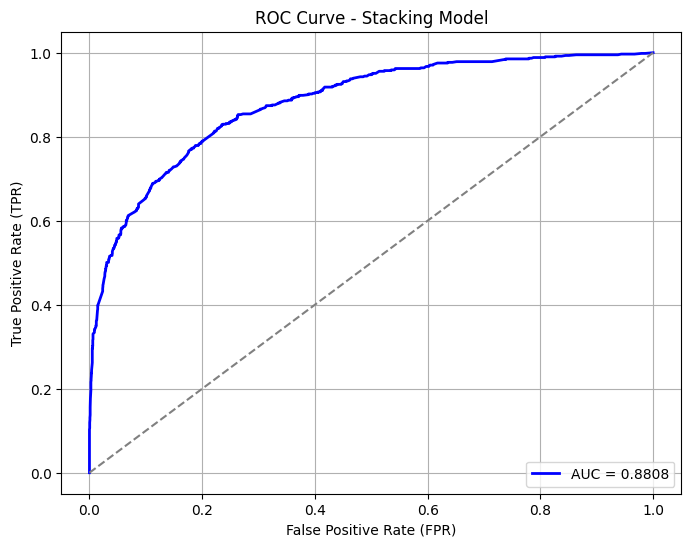

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# 데이터 로드
df = pd.read_csv('./data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'country']

# One-Hot Encoding (국가 컬럼 변환)
X = pd.get_dummies(df[features], columns=['country'])

# 타겟 변수
y = df['churn']

# 정규화 (0과 1 사이)
scaler = MinMaxScaler()
X.iloc[:, :-3] = scaler.fit_transform(X.iloc[:, :-3])  # 마지막 3개 컬럼(country_OneHot)은 정규화 제외

# 데이터 분할 (학습: 70%, 테스트: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 개별 모델 정의
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9988,
    learning_rate=0.0591,
    max_depth=4,
    min_child_weight=4,
    n_estimators=152,
    subsample=0.7172,
    scale_pos_weight=1.9,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)
cat_model = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.1, verbose=0, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# 스태킹 모델 정의 (메타 모델: XGBoost)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
       ('cat', cat_model),
        ('rf', rf_model),
        ('ada', ada_model)
    ],
    final_estimator=xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
)

# 모델 학습
stacking_model.fit(X_train, y_train)

# 예측 확률값 (Positive Class의 확률)
y_probs = stacking_model.predict_proba(X_test)[:, 1]

# 최적 Threshold 설정 (Recall 중심)
best_threshold = 0.4933
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f"✅ Stacking Adjusted Accuracy: {accuracy:.4f}")
print(f"🔥 Stacking Adjusted AUC Score: {auc_score:.4f}")
print(f"📊 Stacking Adjusted Classification Report:\n{report}")

# ✅ AUC ROC 그래프 출력
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Stacking Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()